# Movie Review Classification

인터넷 영화 데이터베이스(Internet Movie Database)로부터 가져온 양극단의 리뷰 5만개로 이루어진 IMDB 데이터셋 사용

    (Andrew Maas - Stanford University (https://stanford.io/2w2NUzz))
    
리뷰 텍스트를 기반으로 영화 리뷰를 긍정(positive)과 부정(negative)으로 분류
    
training data : 25,000EA / test data : 25,000EA

50% : negative / 50% : positive

---

### 1. IMDB 데이터셋 로드

In [1]:
import numpy as np

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words=10000 : training data에서 가장 자주 나타나는 단어 1만 개만 사용

Using TensorFlow backend.


In [2]:
# Check

print(train_data[0], end='\n\n') # 리뷰의 목록 - 각 리뷰는 단어 인덱스의 리스트
print(max([max(sequence) for sequence in train_data]), end='\n\n') # 가장 자주 등장하는 단어를 1만개로 제한, 9999가 최대

word_index = imdb.get_word_index() # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑하도록 뒤집는다.
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) # 리뷰를 디코딩 
# 0,1,2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺀다.
print(decoded_review)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

9999

? this film was just brilliant casting location scene

### 정수 시퀀스를 이진 행렬로 인코딩하기

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension)) # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만든다.
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1. # result[i]에서 특정 인덱스의 위치를 1로 만든다.
    return results

x_train = vectorize_sequences(train_data) # 훈련 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터를 벡터로 변환
print(x_train[0])
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

[0. 1. 1. ... 0. 0. 0.]


### 모델 정의하기

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


Dense 층에 전달할 매개변수(16)은 은닉 유닛(hidden unit)의 개수이다.

하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 된다.

**활성화 함수**

가설 공간을 풍부하게 만들어 층을 깊게 만드는 장점을 살리기 위해서는 비선형성 또는 활성화 함수를 추가해야 한다.

relu와 같은 활성화 함수(또는 비선형성(non-linearity))가 없다면 Dense 층은 선형적인 연산인 점곱과 덧셈 2개로 구성된다.

### 모델 컴파일하기

In [5]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

### 옵티마이저 설정하기

In [6]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 손실과 측정을 함수 객체로 지정하기

In [7]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss = losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [8]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 검증 세트 준비하기

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 모델 훈련하기

In [10]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 300us/step - loss: 0.5085 - acc: 0.7815 - val_loss: 0.3797 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 4s 244us/step - loss: 0.3004 - acc: 0.9045 - val_loss: 0.3002 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 4s 239us/step - loss: 0.2179 - acc: 0.9281 - val_loss: 0.3081 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 4s 246us/step - loss: 0.1750 - acc: 0.9435 - val_loss: 0.2840 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 4s 237us/step - loss: 0.1426 - acc: 0.9545 - val_loss: 0.2848 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 4s 241us/step - loss: 0.1151 - acc: 0.9651 - val_loss: 0.3146 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 4s 239us/step - 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### 훈련과 검증 손실 그리기

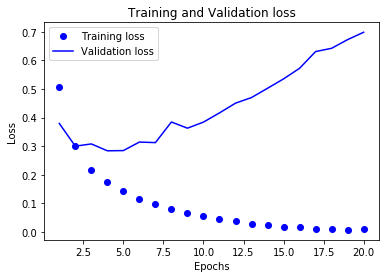

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss') # 'bo'는 파란색 점을 의미한다
plt.plot(epochs, val_loss, 'b', label='Validation loss') # 'b'는 파란색 실선을 의미한다
plt.title("Training and Validation loss")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 훈련과 검증 정확도 그리기

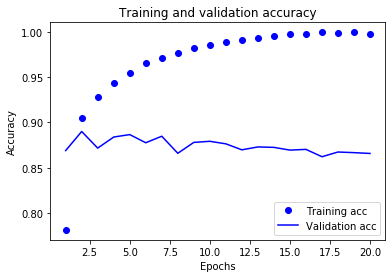

In [12]:
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 모델을 처음부터 다시 훈련하기

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 168us/step - loss: 0.4749 - acc: 0.8219
Epoch 2/4
25000/25000 [==============================] - 4s 156us/step - loss: 0.2666 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 4s 154us/step - loss: 0.1986 - acc: 0.9294
Epoch 4/4
25000/25000 [==============================] - 5s 205us/step


In [14]:
results

[0.3242512036418915, 0.87316]

### 훈련된 모델로 새로운 데이터에 대해 예측하기

모델을 훈련시킨 후에 predict 메서드를 사용해서 어떤 리뷰가 긍정일 확률을 예측할 수 있다.

In [15]:
model.predict(x_test)

array([[0.135813  ],
       [0.99971324],
       [0.27685037],
       ...,
       [0.0709407 ],
       [0.04261154],
       [0.47300315]], dtype=float32)